# **Neural Style Transfer With Tensorflow Tutorial**

Source for code: https://www.tensorflow.org/tutorials/generative/style_transfer

**Goal**: Created this notebook to explain in depth how to implement neural style transfer and how it works




---
**What is Neural Style Transfer?**

Neural Style Transfer is taking a content an image, this image of Michael Jordan from 1995, and a style image this famous Van Gogh painting “The Starry Night” and combining the two to produce an image that looks like the combination of the two


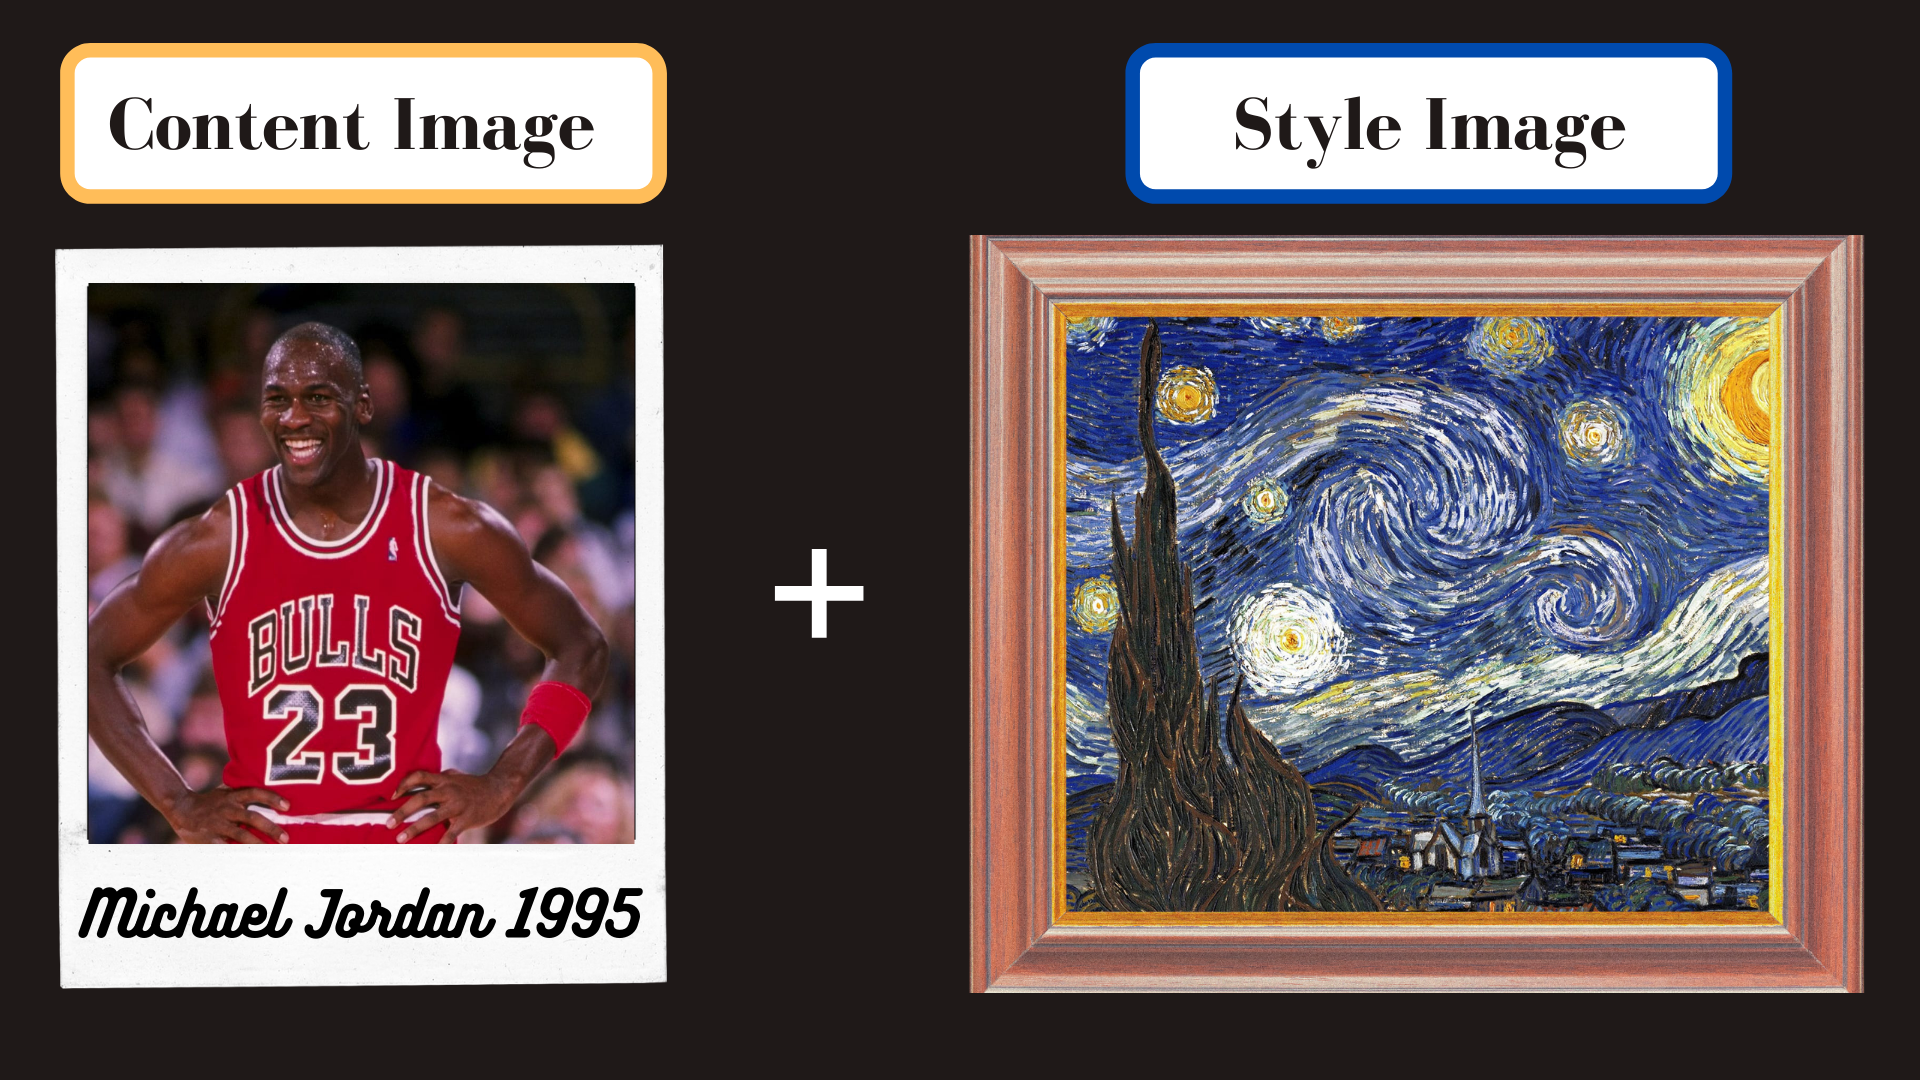





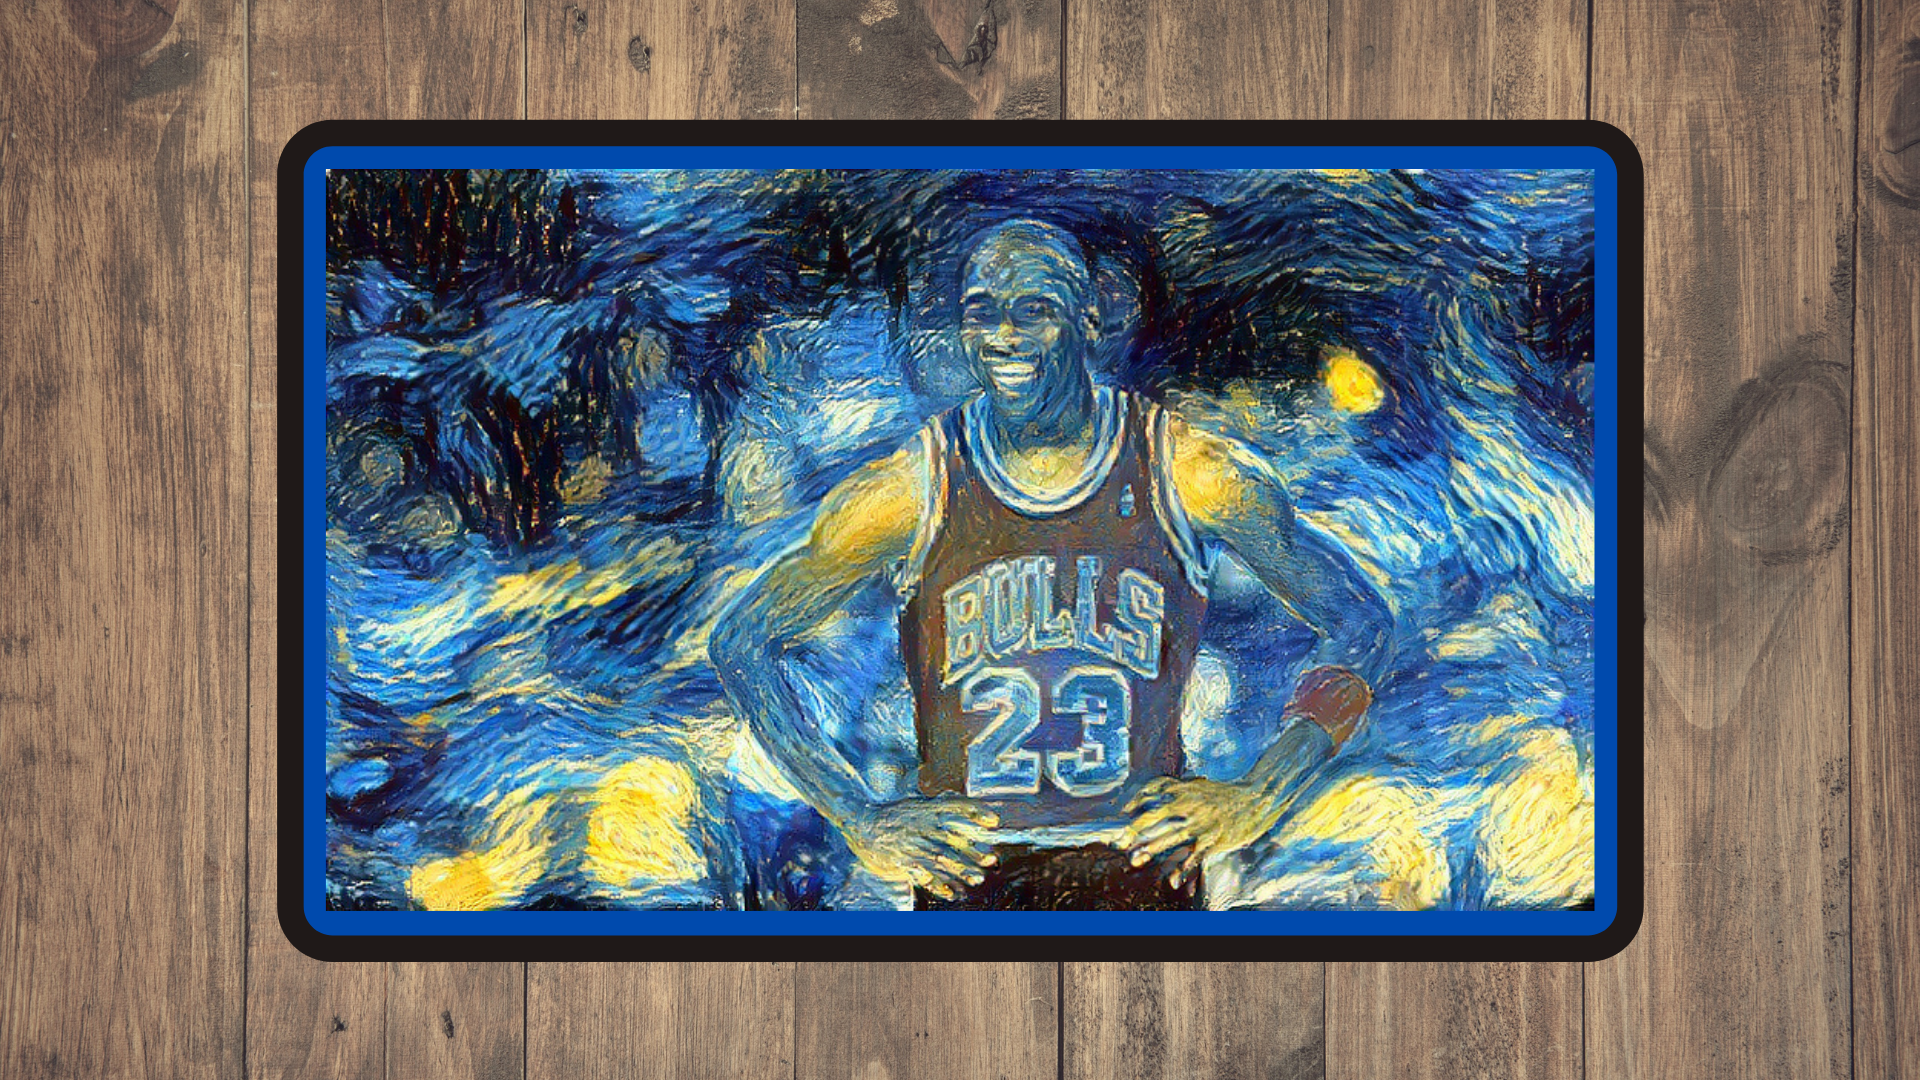

# **Importing Libraries for NST**

In [ ]:
import os
import tensorflow as tf


#Allows the user to import compressed versions of any tensorflow hub model that will be used in the code
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

#The following libraries below allow the user to display the images as they are being modified
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl



#Establishing the formatting of image outputs
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools



# **Image Preprocessing**

**What is a tensor & why is it important?**

As depicted below a tensor is an N-dimensional array of data, and in our case that data is an IMAGE, the dimensions of our images because of RGB is 3 by x  (width of image) by y (height of the image)

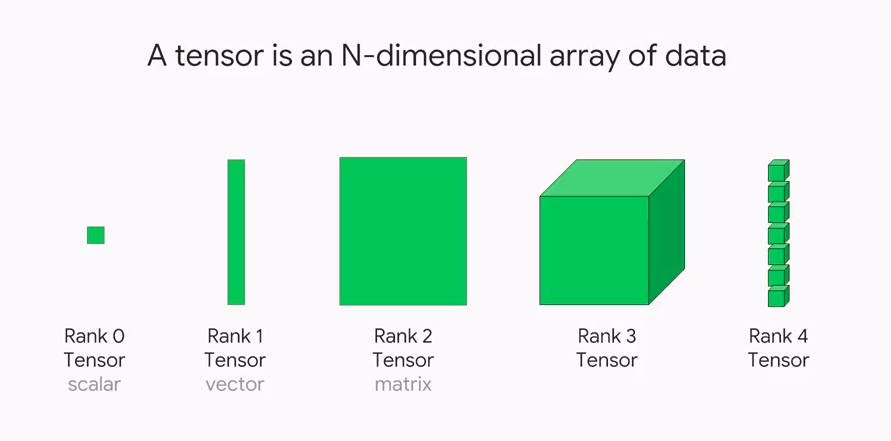


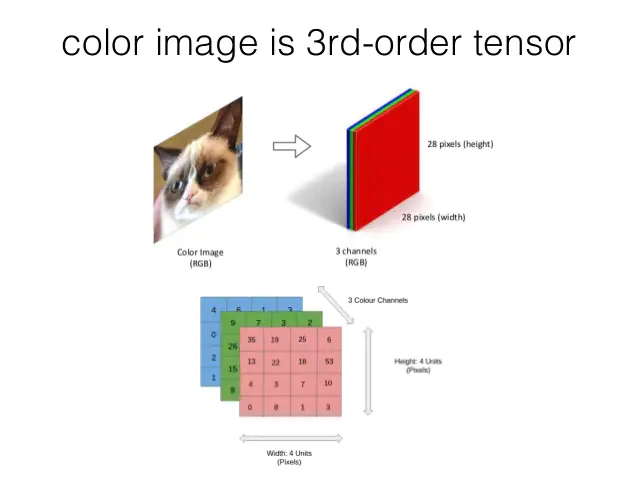

In [ ]:
#Converting the format that the model (Neural Network) uses to process images to a format that we can visualize
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
#content image path & style image path
import cv2

content_path = '/content/Snapshot - 3.png'
style_path = '/content/VG485-1000x1000.jpeg'

#this is to retrieve the images that we will be combining

# **Loading Our Images & Displaying Them**

In [ ]:
#This function is giving the user the ability to load images

def load_img(path_to_img): 
  # max dimension of the images that we are importing
  max_dim = 512


#Here we are loading our file, decoding it into a 3 dimensional tensor and converting it into a file based on format
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
#Function to display the image
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

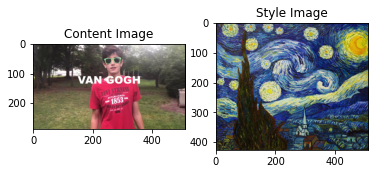

In [ ]:
#Loading in our content and style image and displaying them
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

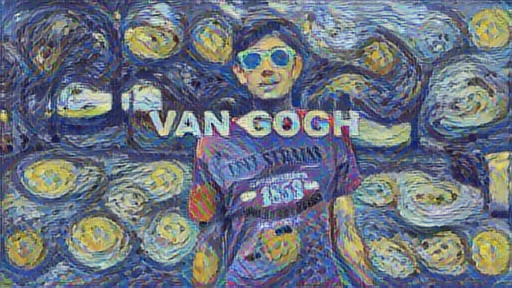

In [ ]:
#Using our model through tensorflow hub and instantiating our stylized image by using our model on the content and style image
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)